# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

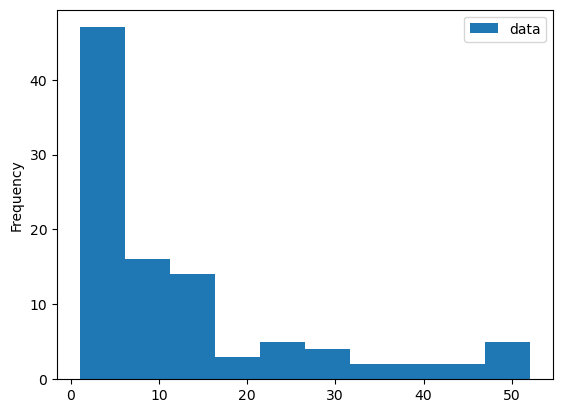

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

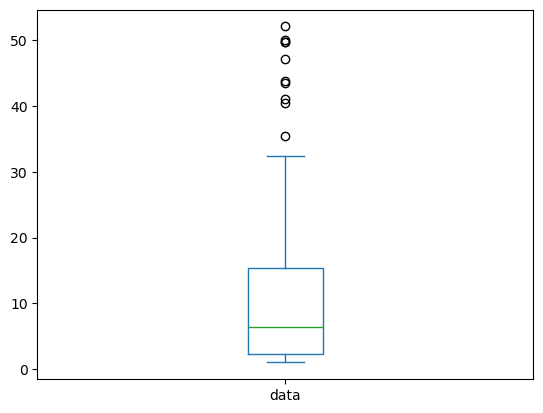

In [3]:
df.plot.box()

***
### Pros and Cons of Each Visualization:
Histogram:


# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# Load the dataset
loan = pd.read_csv('loan.csv')

<h1 style="text-align: center;">Dataset Summary</h1>
To do an quick recap of the dataset

In [6]:
# Basic information about the dataset
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [7]:
# Statistics for numeric columns
loan.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [8]:
# First few rows of the dataset
print("Sample Data:\n")
loan.head()

Sample Data:



,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


<h1 style="text-align: center;">Data Analysis</h1>


- ### Histograms and histogram variants for each feature or column. (Swarm plot, kde plot, violin plot).
***

In [37]:
numeric_columns = loan.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')


### Histograms

Histograms show the distribution of numerical data, allowing us to see patterns.

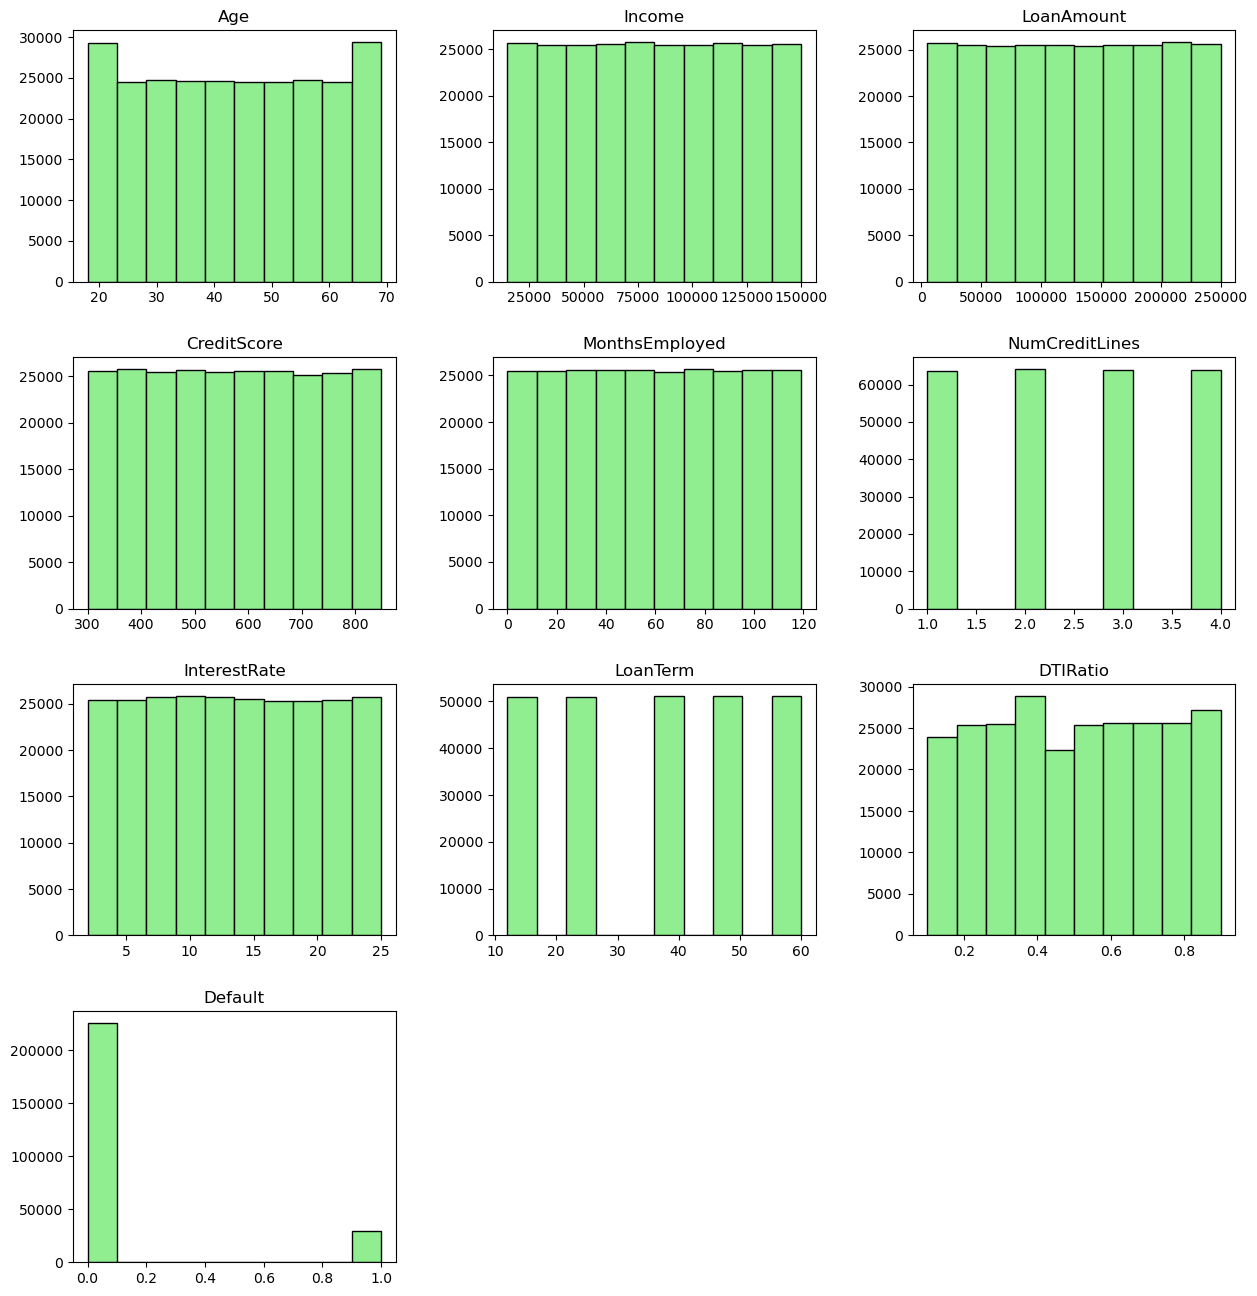

In [8]:
_ = loan.hist(figsize=(15, 16),color = 'lightgreen', edgecolor='black', grid = False)

### Finding:

- `Age`is symmetric, bi-modal distribution, as there are 2 peaks 
- `Income, Loan Amount, Credit Score, Months Employed, DTI Ratio and Interest Rate` appear to have a uniform distribution, meaning the values are spread relatively evenly across their range.
- `Loan Term` show gaps in the distribution, possibly due to specific values being more common.
- `Num Credit Lines` has a multimodal distribution, meaning certain values are more frequent than others.
- `Default Status` is highly imbalanced, with most borrowers not defaulting (0) and a small fraction defaulting (1), making it a skewed binary distribution.

### KDE (Kernel Density Estimation) Plots

KDE is a smoothed version of the histogram. It helps to see the shape of the distribution more clearly.

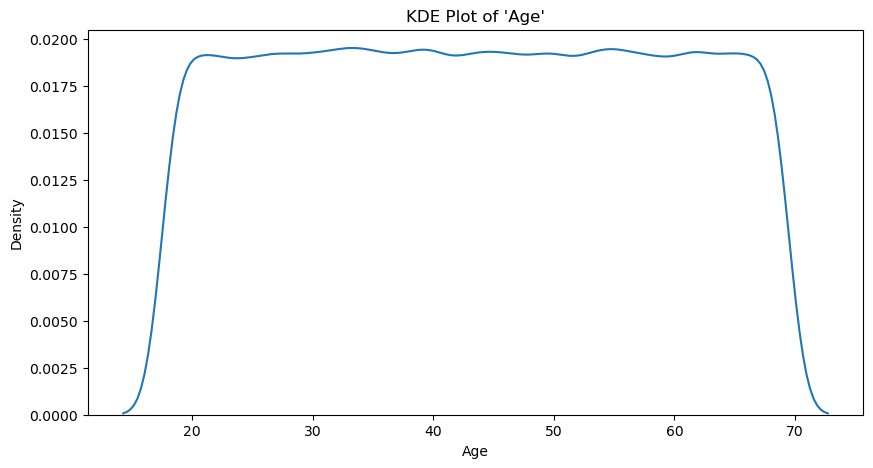

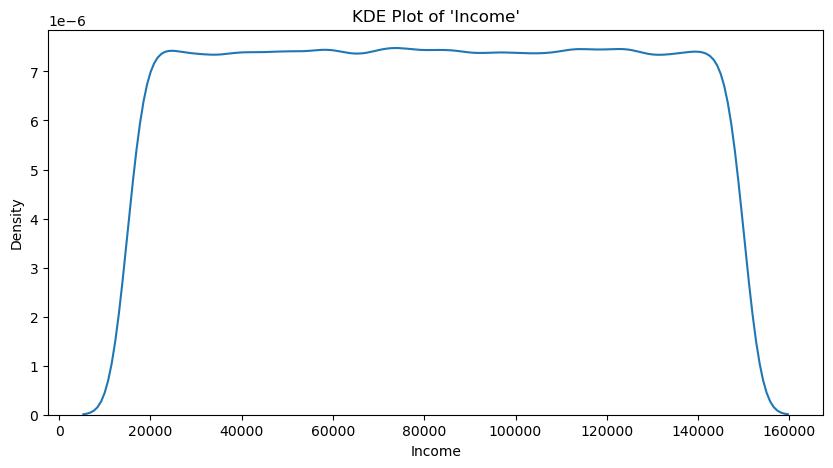

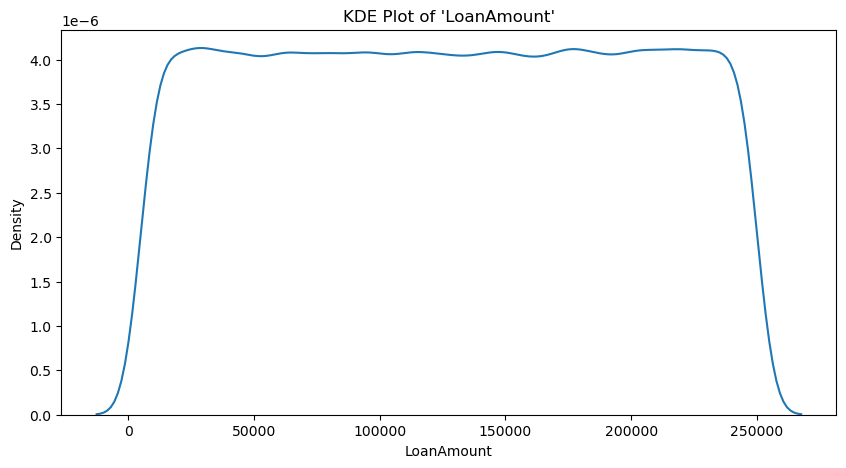

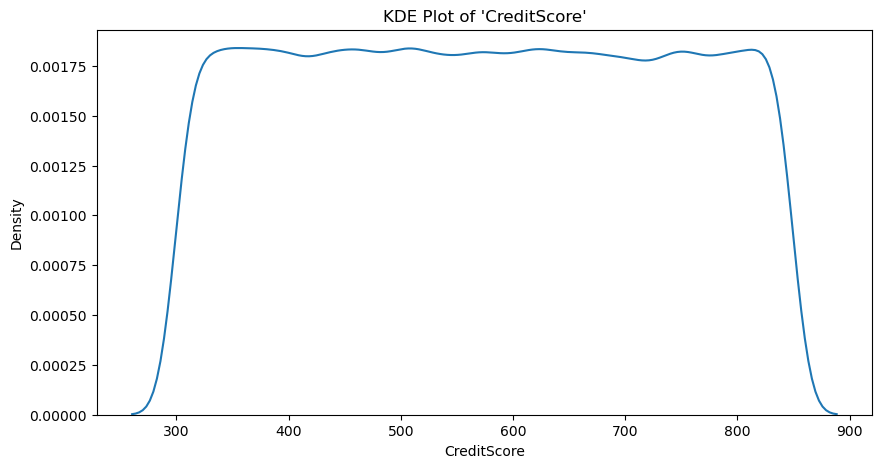

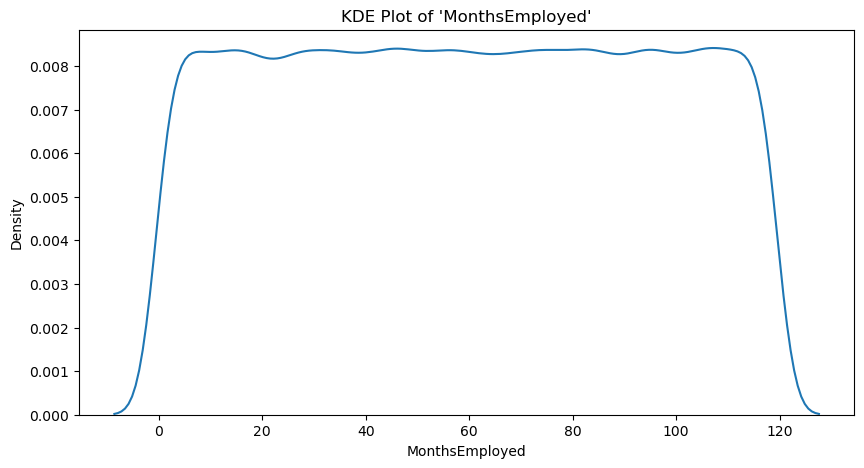

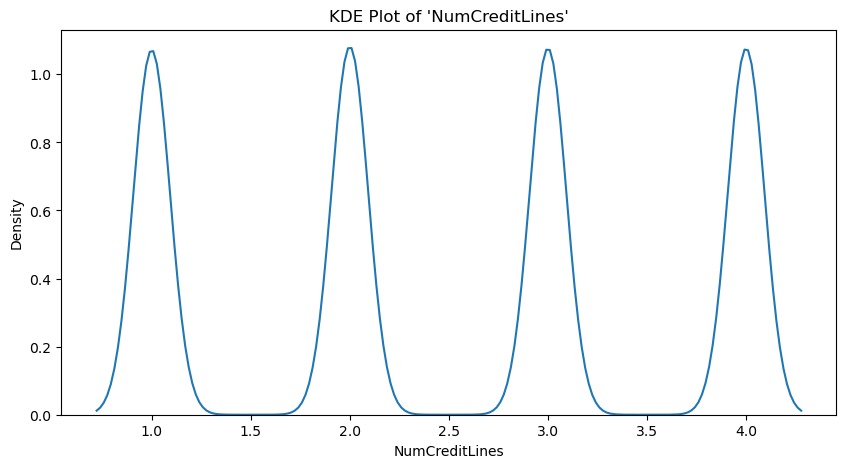

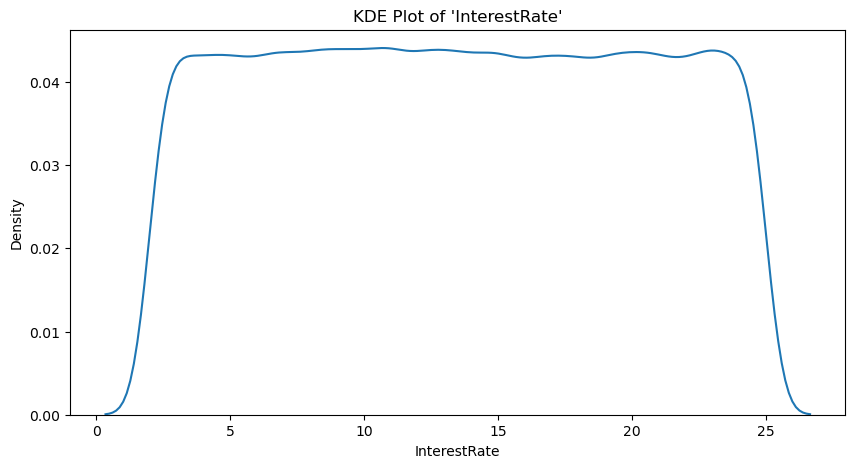

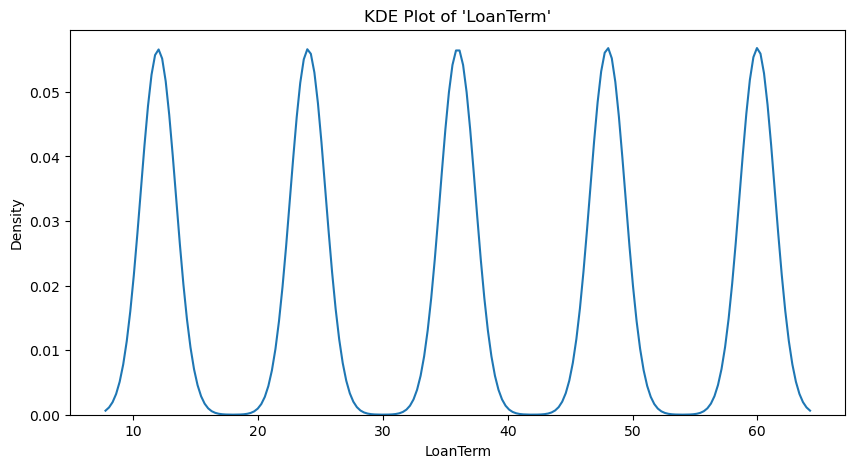

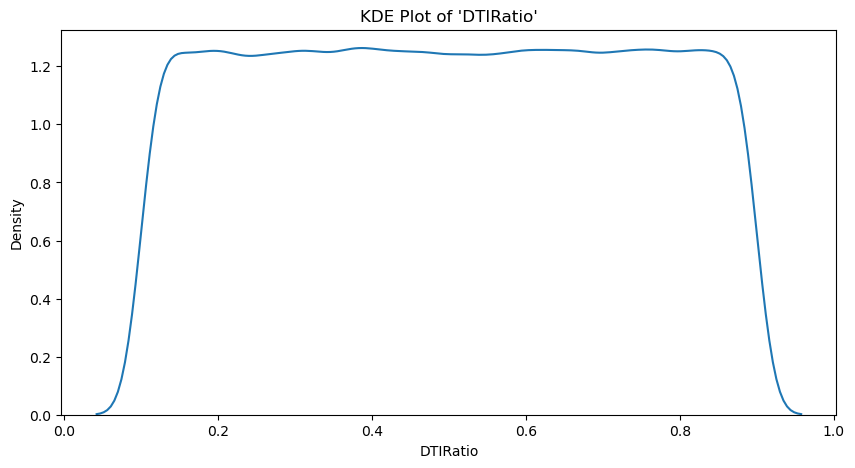

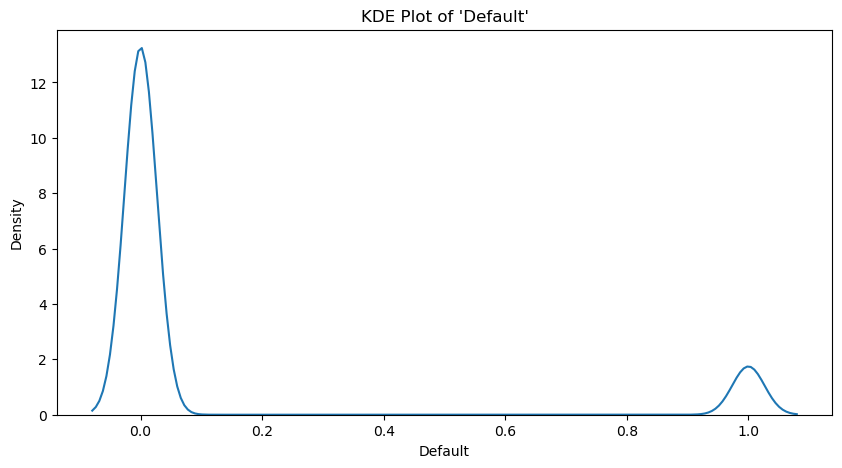

In [11]:
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    
    sns.kdeplot(loan[col])
    
    plt.title(f"KDE Plot of '{col}'")
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

### Violin Plot

Violin plot combines aspects of a box plot and a KDE plot, showing the data distribution as well as the range and outliers.

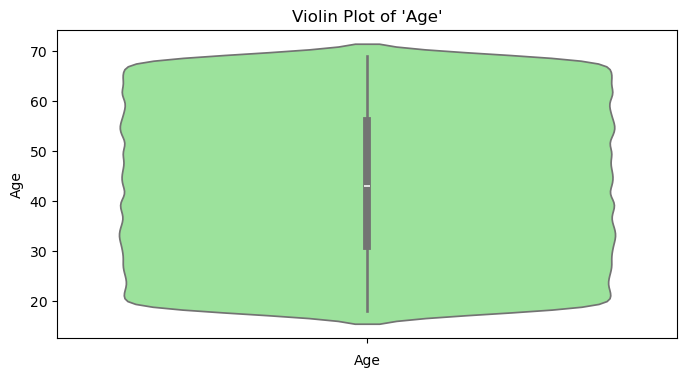

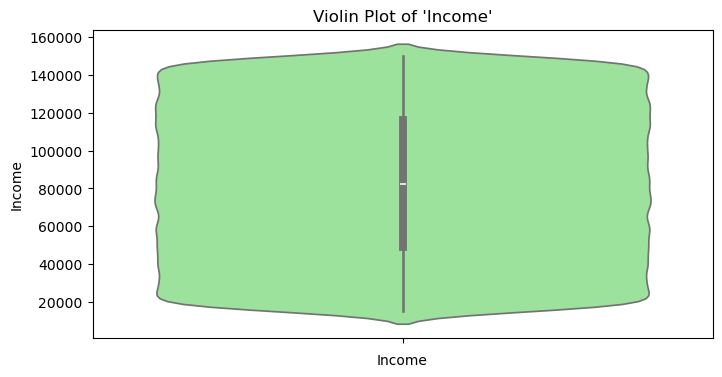

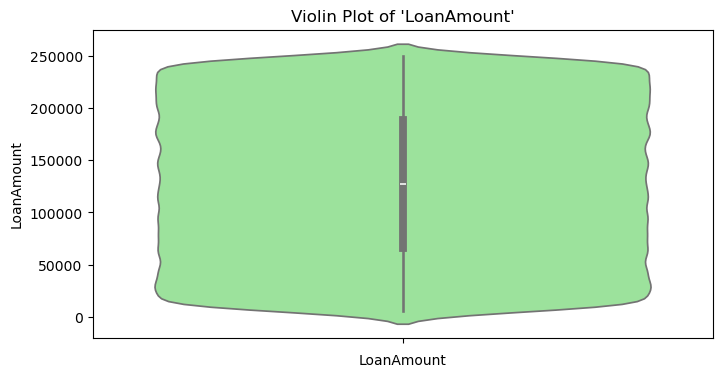

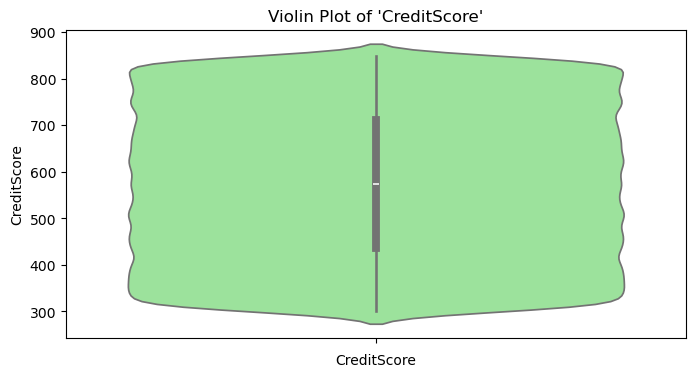

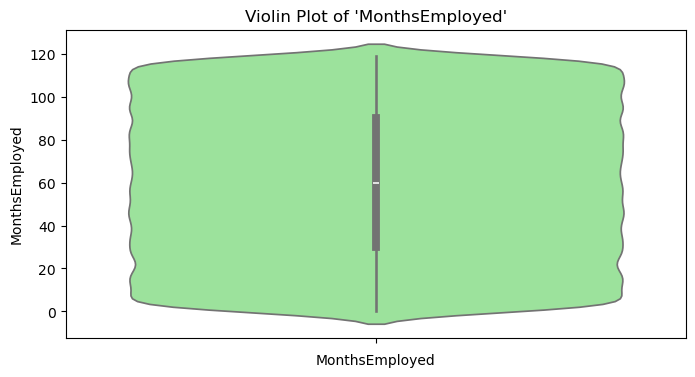

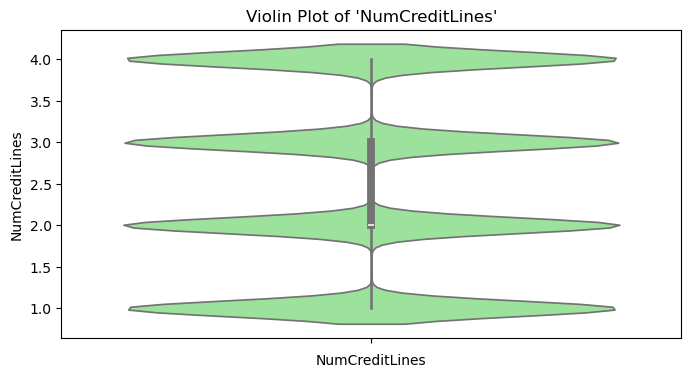

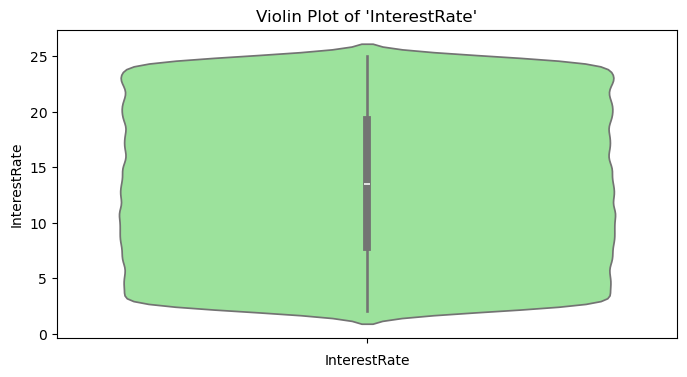

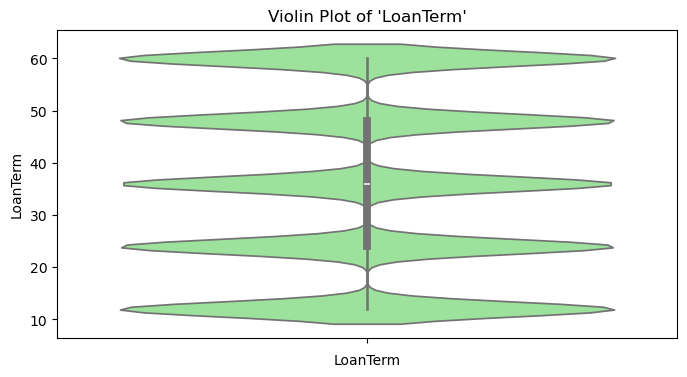

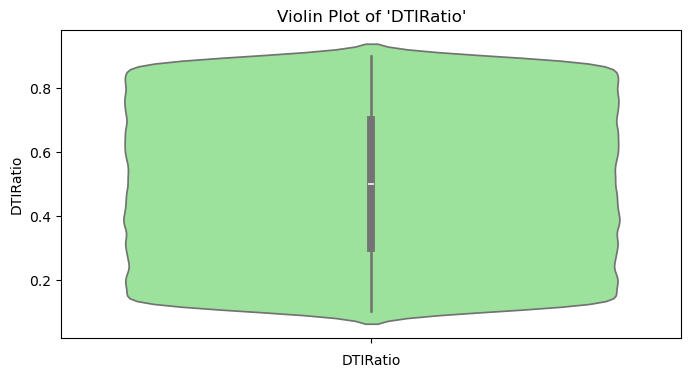

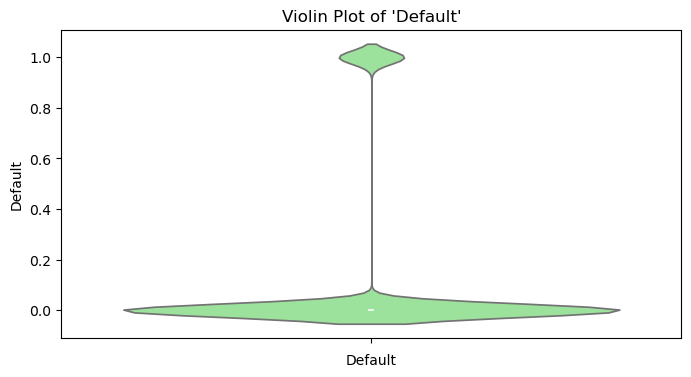

In [12]:
# Violin plot for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(8, 4)) 
    
    sns.violinplot(y=loan[col], color='lightgreen')
    
    plt.title(f"Violin Plot of '{col}'")
    plt.xlabel(col)
    plt.show()

### Swarm Plot
Swarm plot helps to see individual data points and how they are distributed.

Since Swarm Plots can be slow for large datasets, we **sample 500** rows to speed up performance.

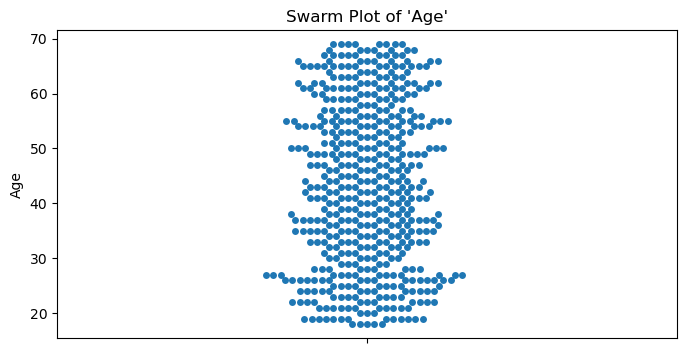

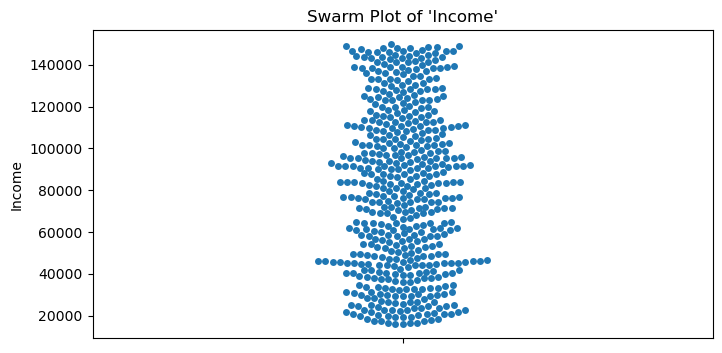

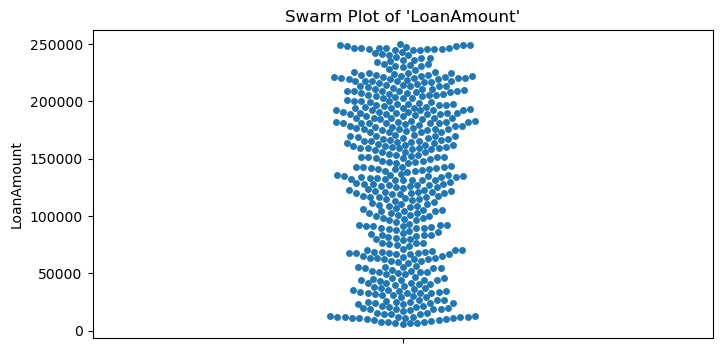

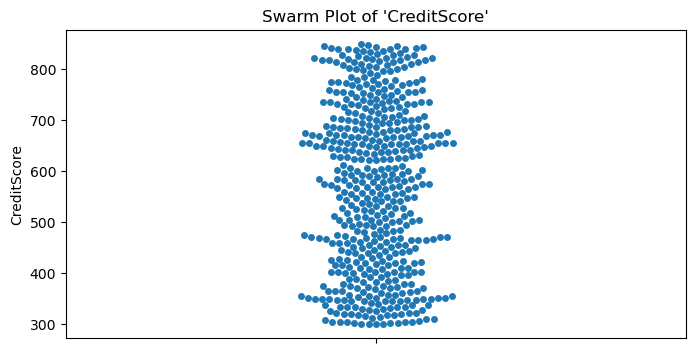

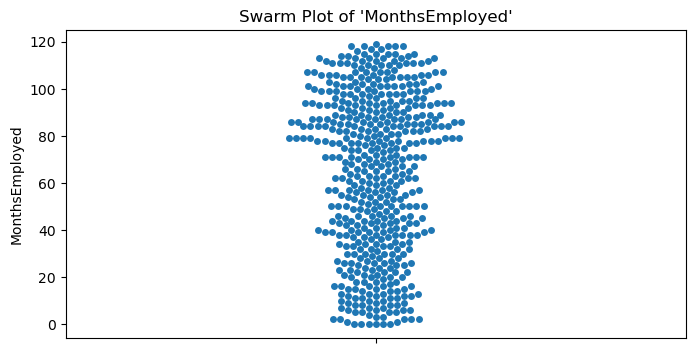

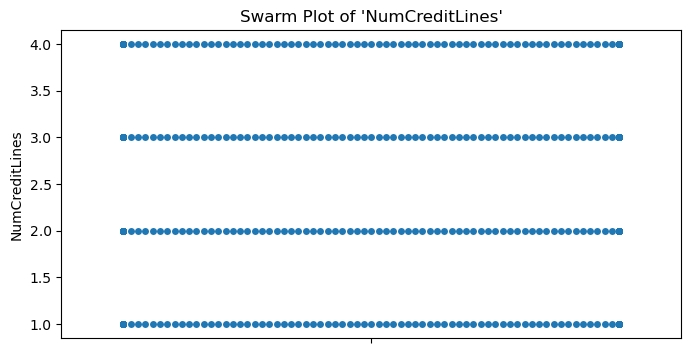

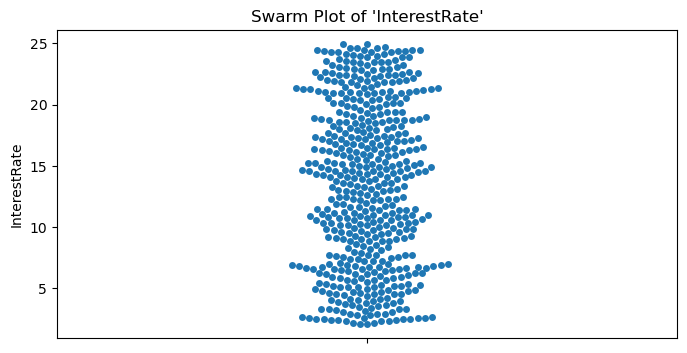

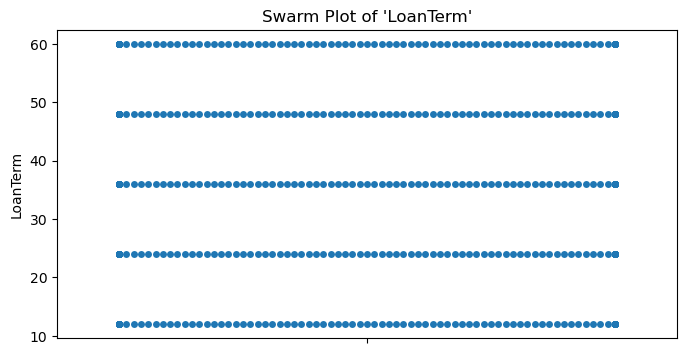

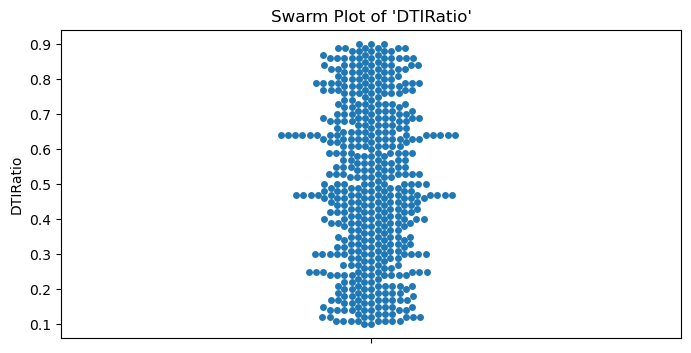

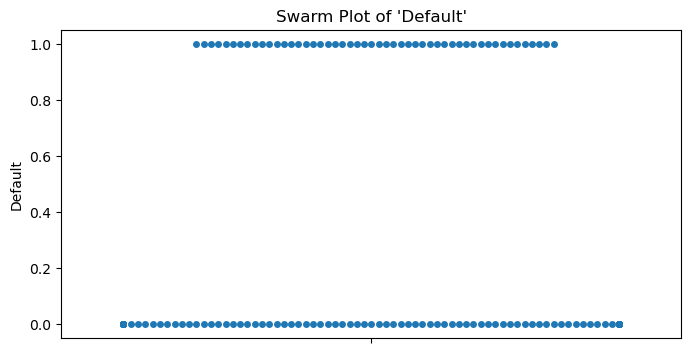

In [13]:
import warnings

# Suppress UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    
    sample_data = loan[col].sample(n=500, random_state=42)
    sns.swarmplot(y=sample_data)
    
    plt.title(f"Swarm Plot of '{col}'")
    plt.show()

- ### Draw grouped histograms. For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.
***

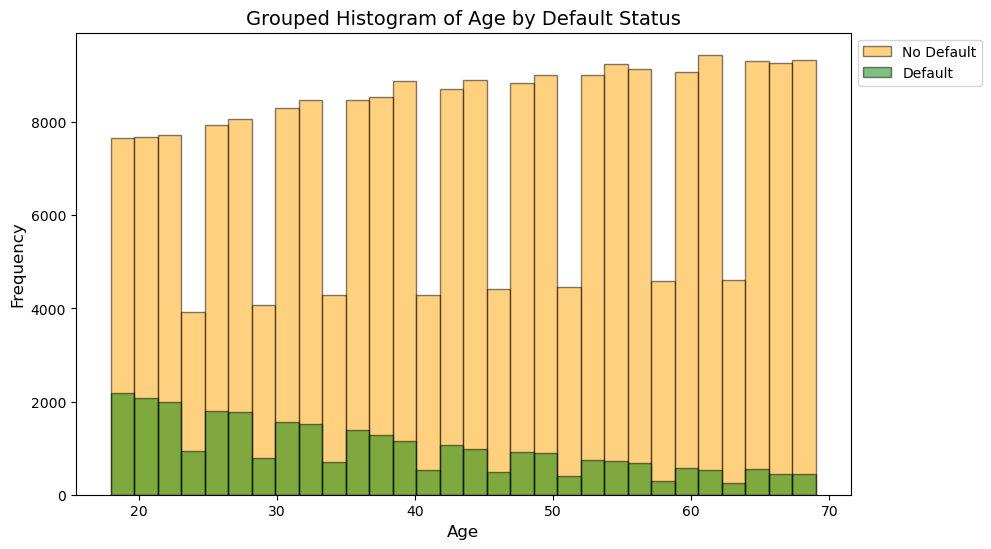

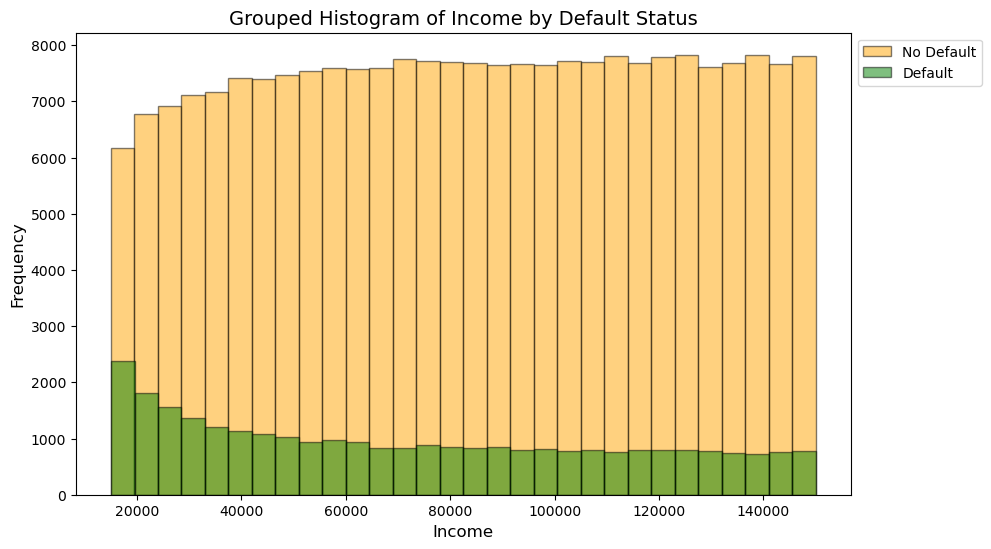

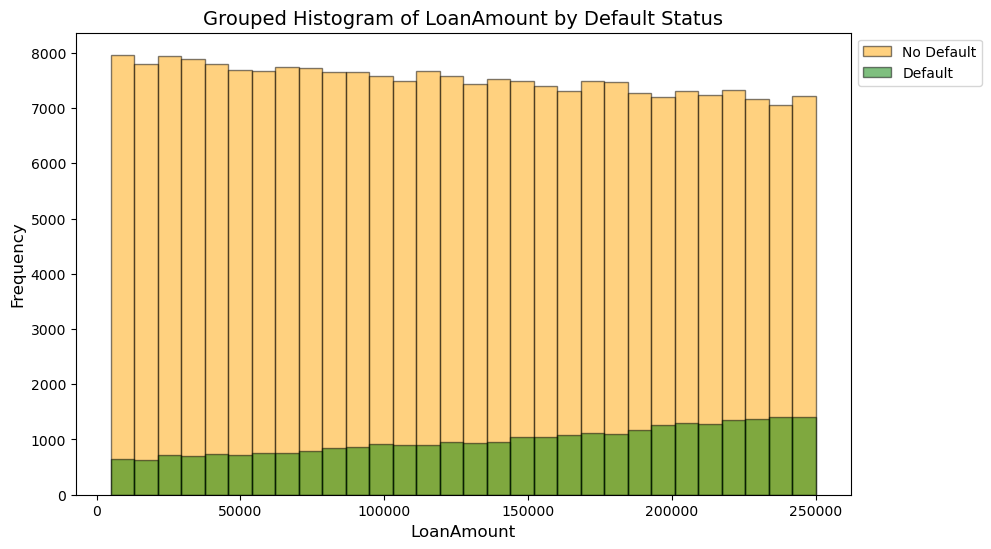

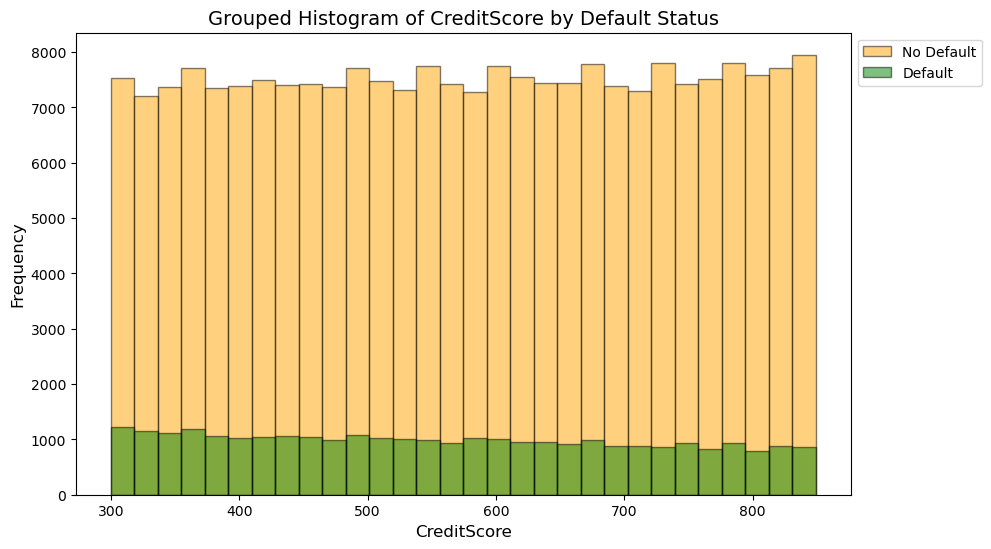

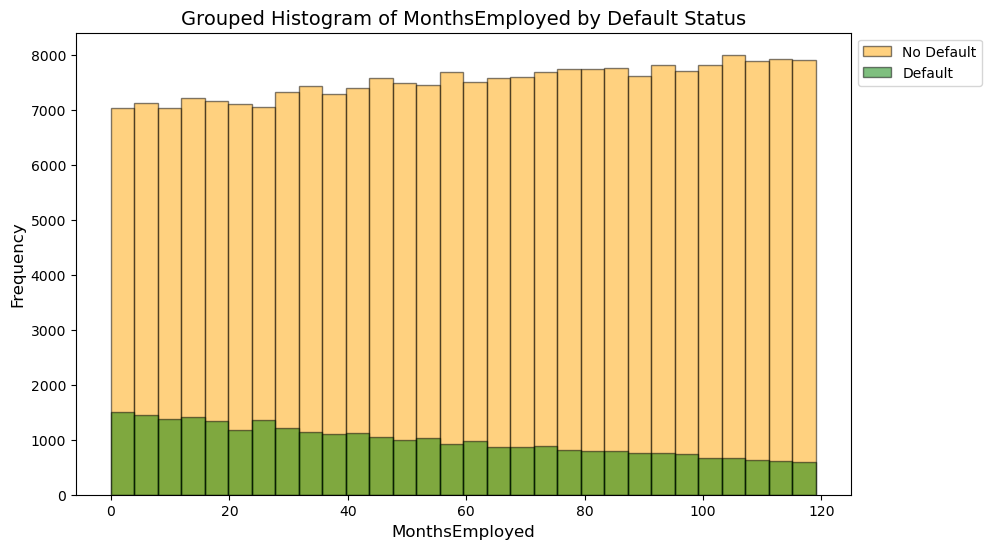

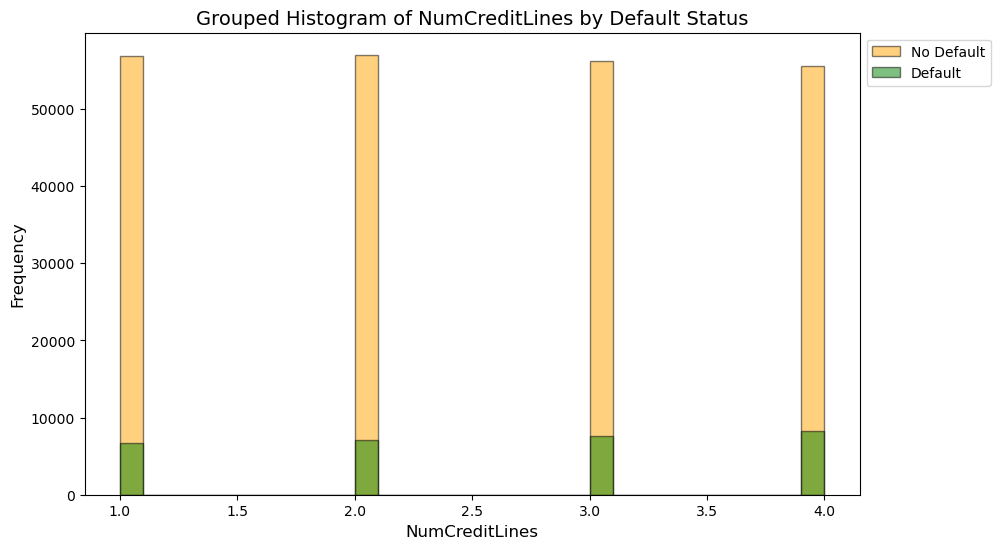

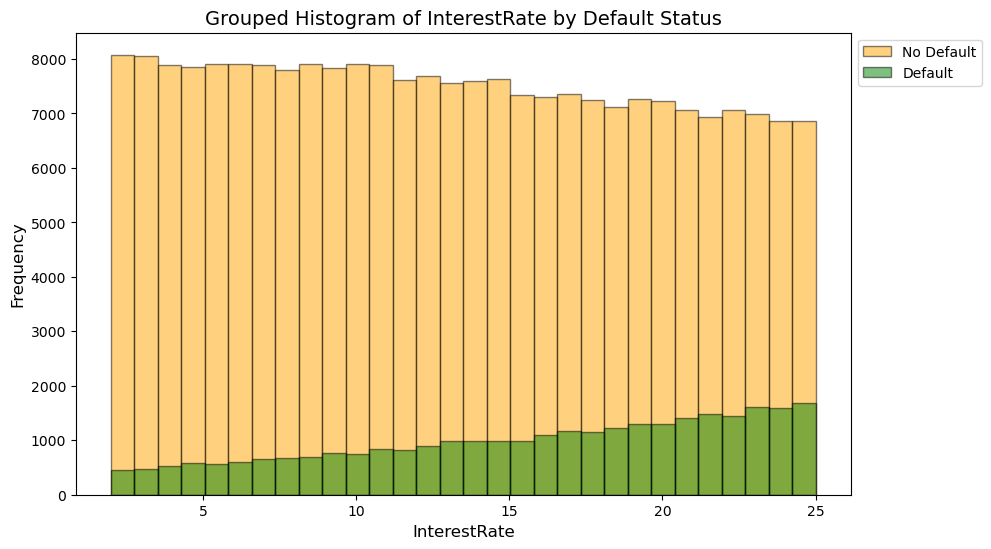

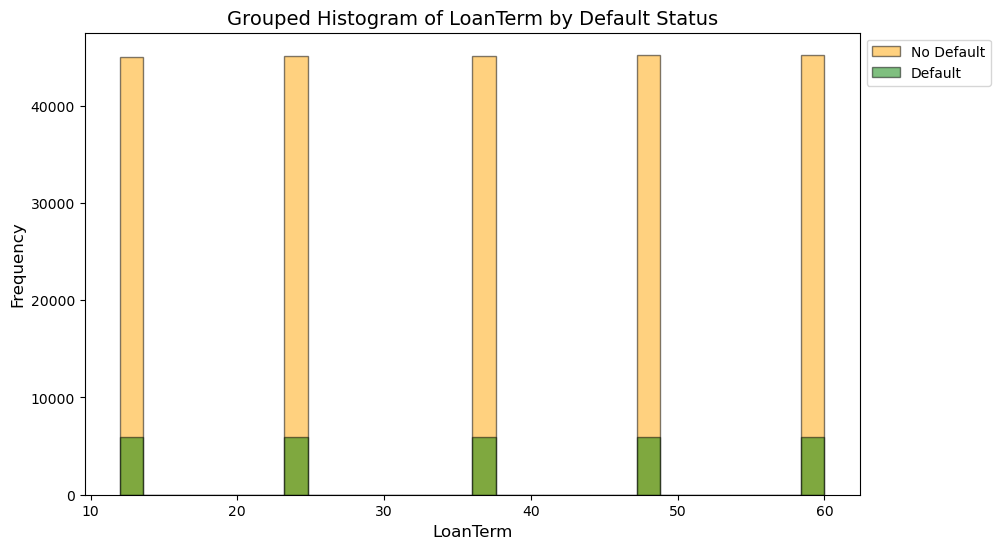

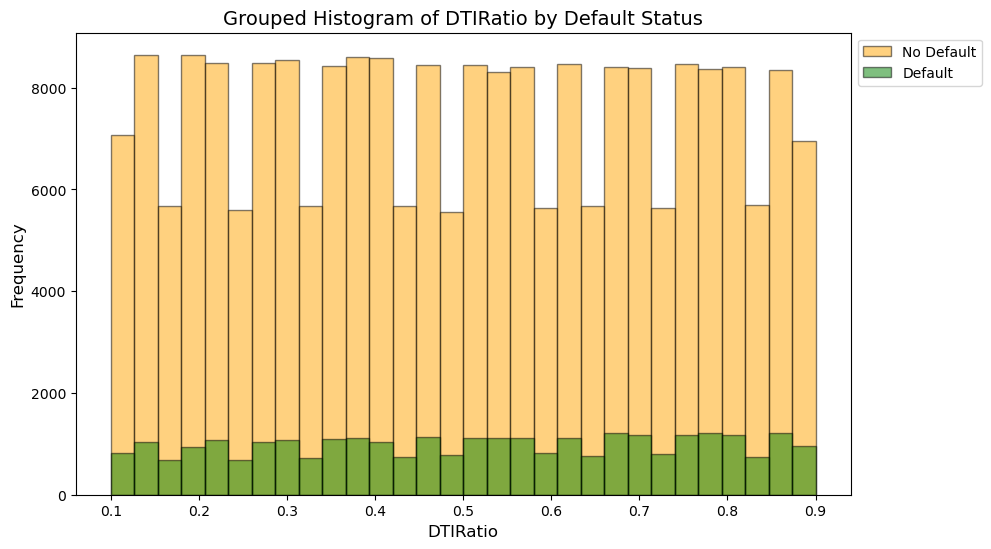

In [40]:
# excluding the target column 'Default'
numeric_no_default = numeric_columns.drop("Default")

bins = 30

# Loop through numeric columns and plot grouped histograms
for col in numeric_no_default:
    plt.figure(figsize=(10, 6))
    
    plt.hist(loan[loan["Default"] == 0][col], bins=bins, alpha=0.5, label="No Default", color='orange', edgecolor='black')
    plt.hist(loan[loan["Default"] == 1][col], bins=bins, alpha=0.5, label="Default", color='green', edgecolor='black')
    
    plt.title(f"Grouped Histogram of '{col}' by Default Status", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

### Grouped Histogram of 'Age' by 'Default Status'

Analyzing how age distribution varies between defaulted and non-defaulted loans to understand potential risk factors.

Using 10 bins to provide a detailed view of the distribution while keeping the visualization clear.

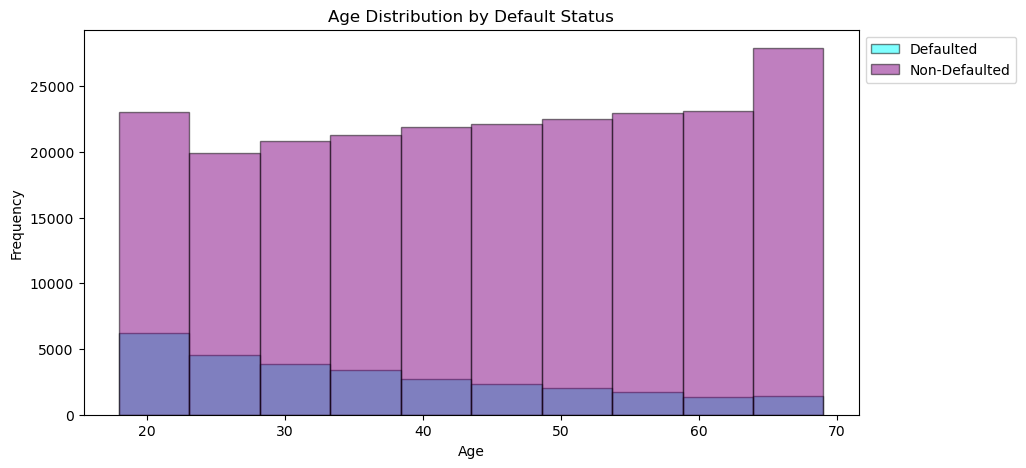

In [14]:
plt.figure(figsize=(10, 5))

# Plot histograms with 30 bins
plt.hist(loan[loan['Default'] == 1]['Age'], bins=10, alpha=0.5, label='Defaulted', color='cyan', edgecolor='black')
plt.hist(loan[loan['Default'] == 0]['Age'], bins=10, alpha=0.5, label='Non-Defaulted', color='purple', edgecolor='black')


plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Default Status')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.show()


- ### Draw a bar plot to indicate total counts of each categorical variable in a given column.
***

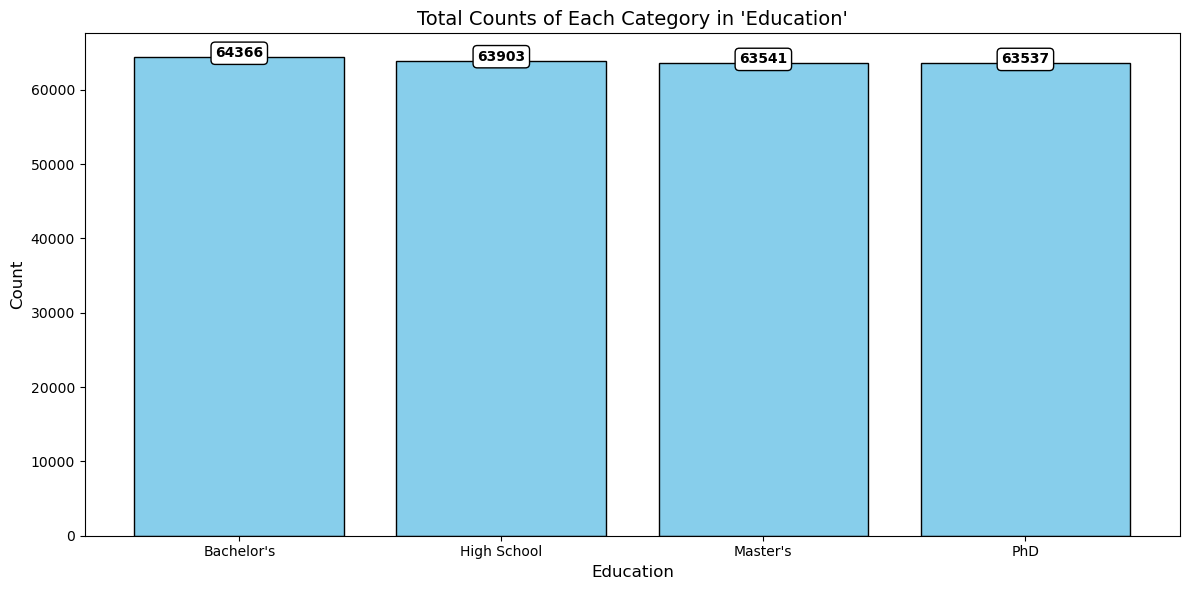

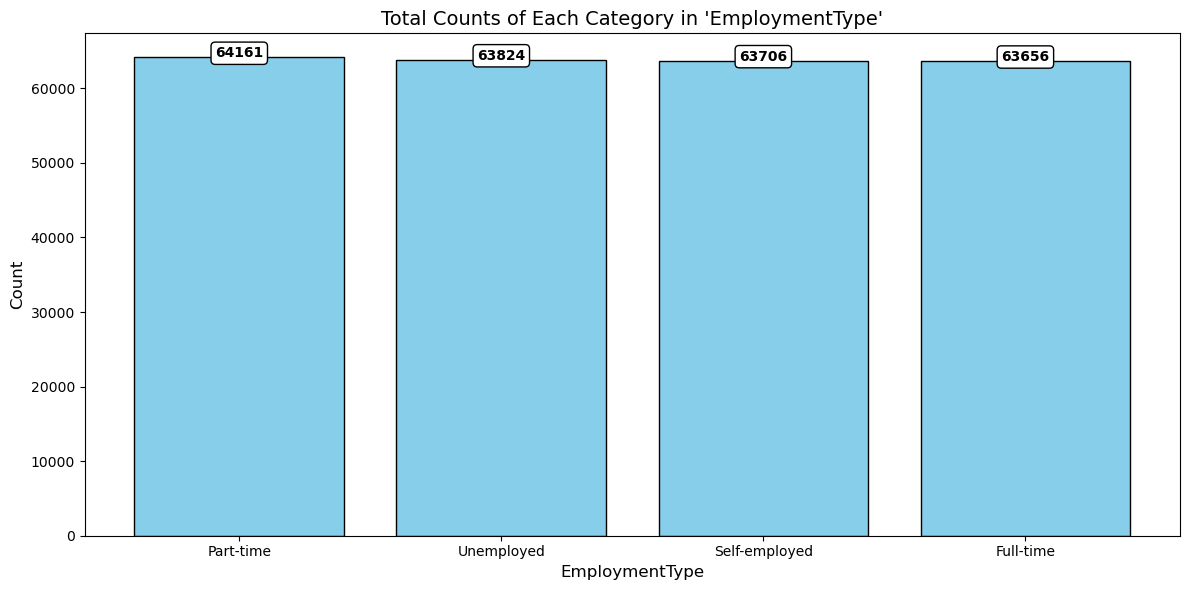

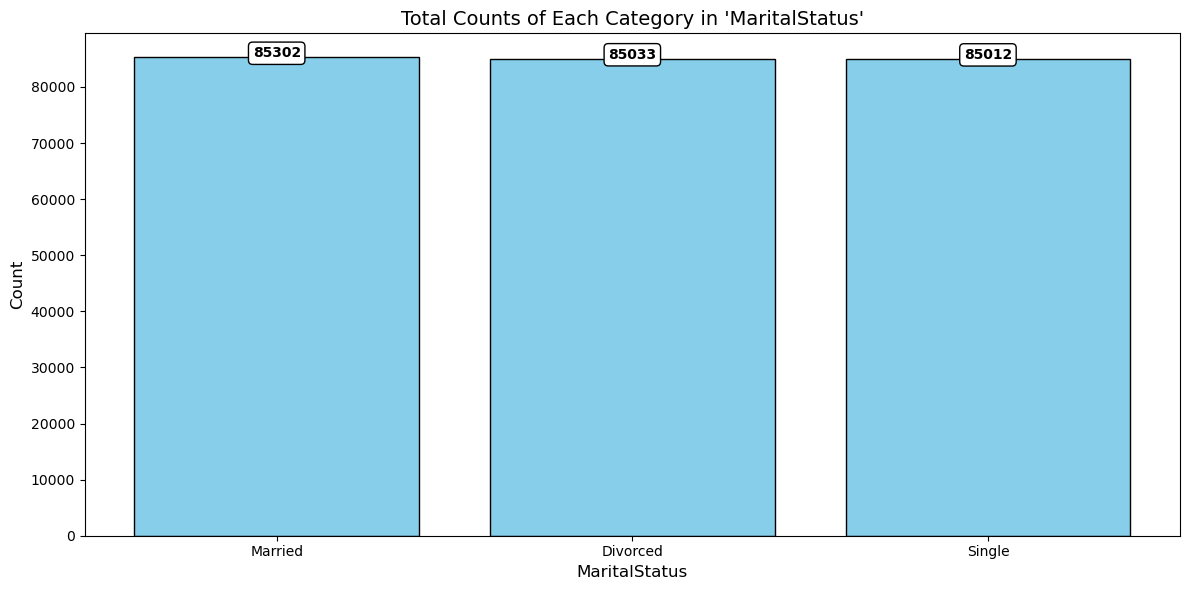

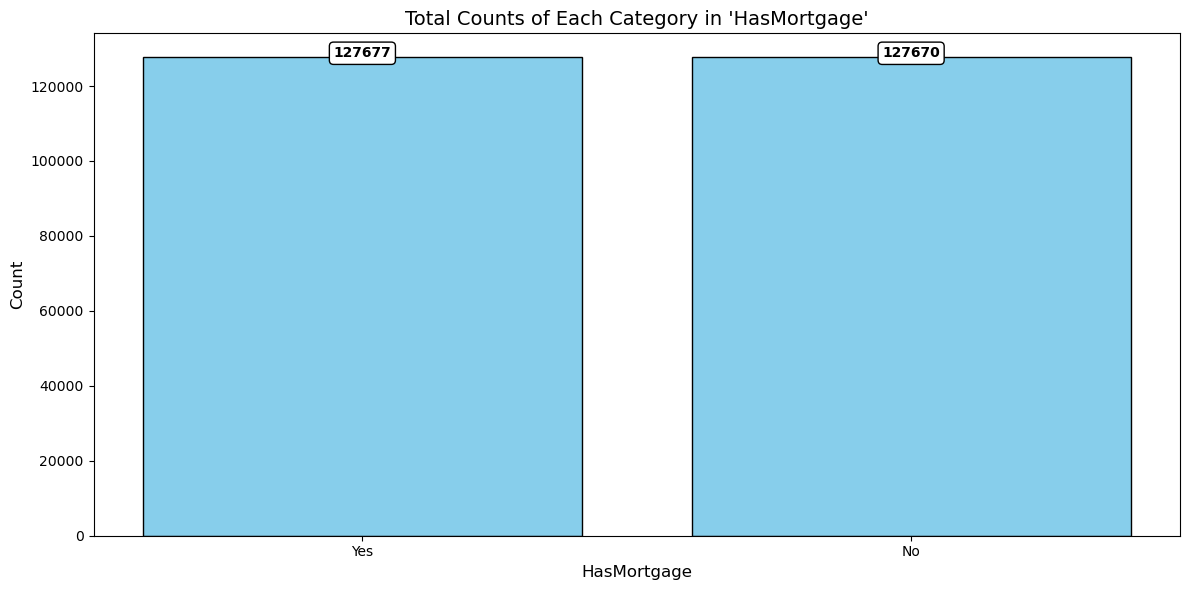

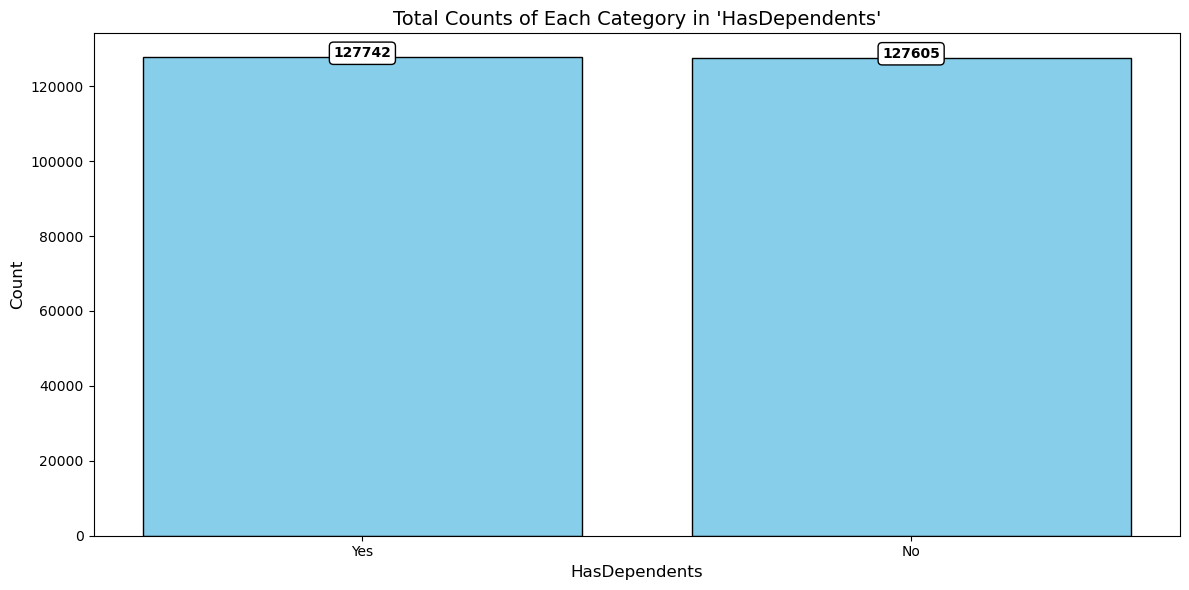

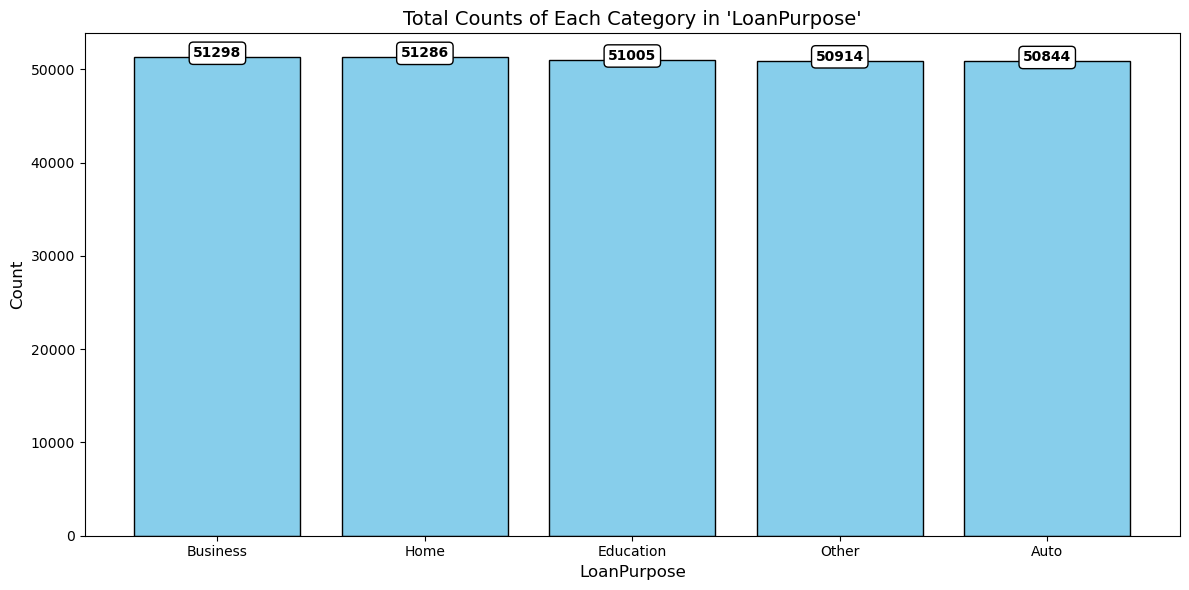

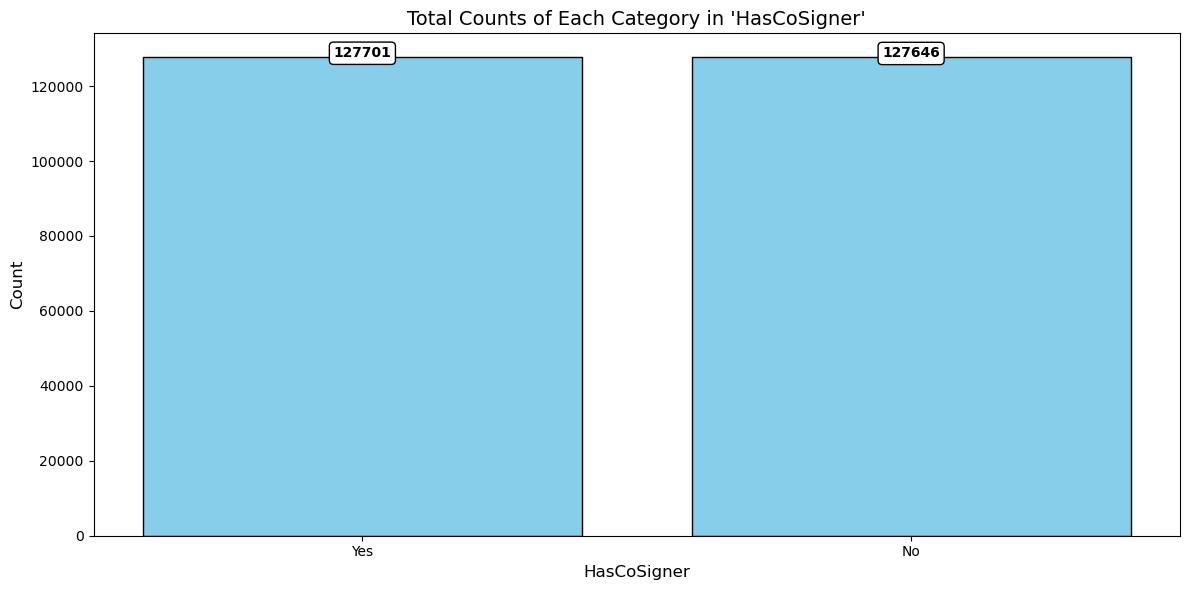

In [31]:
# Identify categorical columns, excluding LoanID
categorical_columns = loan.select_dtypes(include=["object"]).columns.drop("LoanID")

for col in categorical_columns:
    category_counts = loan[col].value_counts()
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(category_counts.index, category_counts.values, color='skyblue', edgecolor='black')

    plt.title(f"Total Counts of Each Category in '{col}'", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)

    for bar in bars:
        height = bar.get_height()
        x_position = bar.get_x() + bar.get_width() / 2
        
        plt.text(x_position, height, str(int(height)), ha='center', fontsize=10, fontweight='bold', 
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))


    plt.tight_layout() 
    plt.show()


- ### Find means, medians, and modes.
***

In [5]:
statistics = []

for column in numeric_columns:
    mean_value = round(loan[column].mean(), 2)  # Round to 2 decimal places
    median_value = loan[column].median()
    mode_values = loan[column].mode().tolist()  # Get all mode values as a list
    
    statistics.append([column, mean_value, median_value, mode_values])

stats_df = pd.DataFrame(statistics, columns=['Column Name', 'Mean', 'Median', 'Modes'])

stats_df

,Column Name,Mean,Median,Modes
0,Age,43.50,43.00,[55]
1,Income,82499.30,82466.00,"[69492, 117102, 121985]"
2,LoanAmount,127578.87,127556.00,"[95419, 133724, 221949]"
3,CreditScore,574.26,574.00,[630]
4,MonthsEmployed,59.54,60.00,[56]
5,NumCreditLines,2.50,2.00,[2]
6,InterestRate,13.49,13.46,[14.92]
7,LoanTerm,36.03,36.00,[48]
8,DTIRatio,0.50,0.50,[0.67]
9,Default,0.12,0.00,[0]


***
### Conclusions

#### 1. Are the data what we expect? Are they usable?

- The data appear reasonable, with key financial attributes like Age, Income, Loan Amount, Credit Score, etc. showing expected distributions. There are no obvious missing or invalid values in the columns, making the dataset usable for analysis.

#### 2. Overall Shape of the Distributions

- The dataset includes uniform, skewed, and multimodal distributions, depending on the feature. The data has different patterns. Age, Income, Loan Amount, Credit Score, Months Employed, and Interest Rate look evenly spread. Loan Term has missing parts, meaning some values happen more often. Num Credit Lines has some values that appear more than others. DTI Ratio is mostly small numbers with a few big ones. Default Status is very unbalanced because most people did not default, and only a few did.

#### 3. Are there any outliers?

- There are **no outliers found** in most of the numerical data. However, the `Default` column has a very unbalanced distribution. This means that most borrowers did not default, while a smaller group did. Out of the total 255,347 borrowers, 225,694 (88.3%) did not default, while 29,653 (11.7%) defaulted, making the data highly skewed.

4.  How does the distribution change across different groups?

When grouped by Default Status:

- Defaulted borrowers (1) tend to have lower Income, Credit Scores, and Months Employed, indicating financial instability.
- Non-defaulted borrowers (0) generally have higher Credit Scores and longer employment history, suggesting better creditworthiness.
- Higher Debt-to-Income Ratios (DTI) are associated with more defaults, meaning borrowers with higher debt burdens are at greater risk.
- The distribution of Age, Loan Amount, and Interest Rate is similar for both groups, meaning these factors alone may not strongly predict default.
- Num Credit Lines and Loan Term show clustered values across both groups, indicating standard lending practices rather than a clear distinction between default risk levels.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

***
### Reproducing the Bar Chart from Storytelling with Data (p. 64)

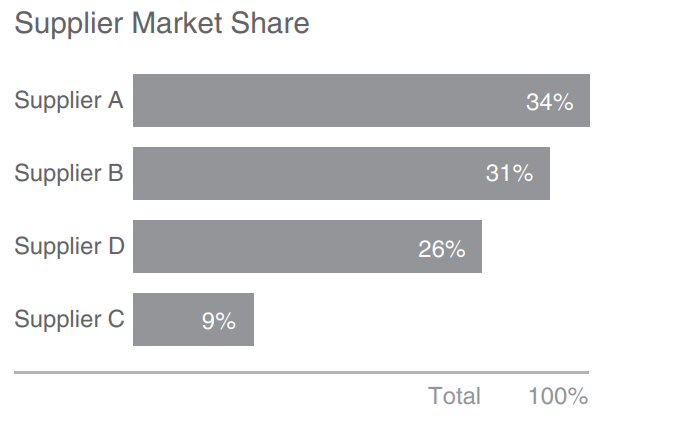

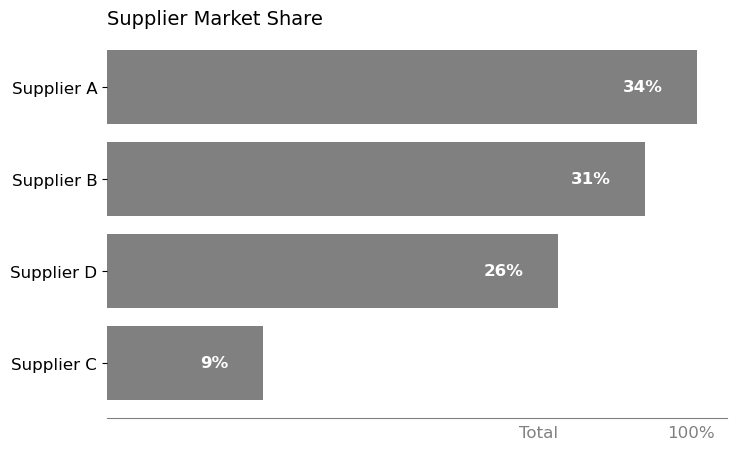

In [33]:
# Create a DataFrame with the data
data = {
    'Supplier': ['Supplier A', 'Supplier B', 'Supplier D', 'Supplier C'],
    'Market Share': [34, 31, 26, 9]
}
df = pd.DataFrame(data)

# Reverse to get the highest value is at the top
df = df[::-1]

# horizontal bar chart
plt.figure(figsize=(8, 5)) 
bars = plt.barh(df['Supplier'], df['Market Share'], color="gray")

# Add percentage labels inside the bars
for bar, percentage in zip(bars, df['Market Share']):
    plt.text(bar.get_width() - 2, 
             bar.get_y() + bar.get_height()/2,  
             f"{percentage}%",  # Display percentage
             va='center', ha='right', color='white', fontsize=12, fontweight='bold')

plt.title("Supplier Market Share", fontsize=14, loc='left')

#Clean up
plt.gca().spines["top"].set_visible(False) 
plt.gca().spines["right"].set_visible(False) 
plt.gca().spines["left"].set_visible(False)  
plt.gca().spines["bottom"].set_color("gray") 

# Add a "Total 100%" label at the bottom
plt.text(26, -0.8, "Total", fontsize=12, ha='right', color='gray')
plt.text(35, -0.8, "100%", fontsize=12, ha='right', color='gray')

# Hide x-axis labels for a cleaner look
plt.xticks([])  
plt.yticks(fontsize=12) 

plt.show()